<a href="https://colab.research.google.com/github/Arthur2303/Circuitos-Eletricos-I/blob/main/CE_Lista3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.core.display import HTML
from IPython.display import Image
HTML("""

.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}

""")

if 'google.colab' in str(get_ipython()):    
    ! git clone -b master https://github.com/edsonportosilva/ElectricCircuits
    from os import chdir as cd
    cd('/content/ElectricCircuits/')
    ! pip install -e .
    
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from circuit.utils import round_expr, symdisp, symplot

from sympy.polys.partfrac import apart
from sympy.tensor.array.ndim_array import sympify

# temp workaround
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['legend.fontsize'] = 13
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['axes.grid'] = False

__Definindo algumas variáveis simbólicas__

In [ ]:
s     = sp.symbols('s')
a     = sp.symbols('a', real=True, positive=True)
omega, t, τ = sp.symbols('omega, t, τ', real=True)
infty = sp.oo

In [ ]:
# transformada de Laplace
def L(f,t,s):
    return sp.laplace_transform(f, t, s, noconds=True)

# transformada inversa de Laplace
def invL(F,s,t):
    return sp.re(sp.inverse_laplace_transform(F, s, t, noconds=True))

# funções para auxílio na expansão em frações parciais
def adjustCoeff(expr):    
    coeff = expr.as_numer_denom()
    c0 = sp.poly(coeff[1].cancel()).coeffs()[0]
    
    return (coeff[0].cancel()/c0)/(coeff[1].cancel()/c0)

def partFrac(expr, Ndigits):
    expr = expr.cancel()
    expr = apart(adjustCoeff(expr), s, full=True).doit()
    
    return sp.N(expr, Ndigits)

sp.init_printing()

**Sendo $R_1$= 1 $\Omega$, $R_2$ = 8 $\Omega$ e $R_3$ = 10 $\Omega$.**


## __*Problema 1*__



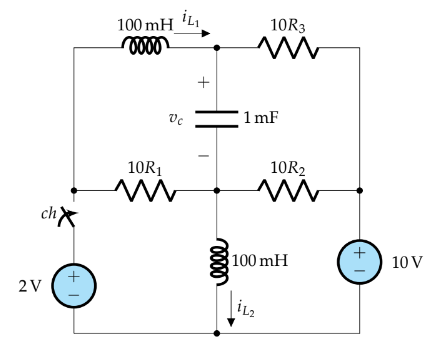

Simulação do circuito: https://tinyurl.com/2e96x45g


c. Determine $I_{L_1}(s), I_{L_2}(s)$ e $V_{C}(s)$ pelo método das tensões de nó. \\
d. Verifique se as respostas encontradas no item anterior estão de acordo com
os teoremas do valor inicial e do valor final. \\
e. Determine $i_{L_1}(t), i_{L_2}(t)$ e $v_{C}(t)$, para $t \ge 0 $. \\

#### **c.**

In [ ]:
C = 1e-3
L = 100e-3

# Valores de corrente e tensão iniciais
I1_0 = -90.9e-3
I2_0 = 215.9e-3
VC_0 = 909.09e-3

In [ ]:
I_L1, I_L2, V_C, VA, VB, s = sp.symbols('I_{L1}, I_{L2}, V_C, V_A, V_B, s')

# define os sistema de equações
eq1 = sp.Eq( (((2/s) - VA)/L + I1_0)*(1/s) + (10/s - VA)/100, ((VA - VB)*s - VC_0)*C )  # I1 + I3 = I4 
eq2 = sp.Eq( ((2/s) - VB)/10 + ((VA - VB)*s - VC_0)*C  + (10/s -VB)/80, (VB/L + I2_0)/s )  # I2 + I4 + I6 = I5

# resolve o sistema
soluc = sp.solve([eq1, eq2],[VA, VB], dict=True)
soluc

VA = [sol[VA] for sol in soluc]
VB = [sol[VB] for sol in soluc]

VA = VA[0]
VB = VB[0]

VA = VA.simplify()
VB = VB.simplify()

I_L1 = (((2/s) - VA)/L + I1_0)*(1/s)
I_L1 = I_L1.simplify()

I_L2 = (VB/L + I2_0)/s
I_L2 = I_L2.simplify()

V_C =  (VA - VB) 
V_C.simplify()

print('Tensões de nó no domínio de Laplace: \n')
symdisp('V_A(s) =', VA, 'Vs')
symdisp('V_B(s) =', VB, 'Vs')

Tensões de nó no domínio de Laplace: 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
# Expressões das tensões nos nós simplificados
symdisp("VA(s):", adjustCoeff(VA), "Vs")

<IPython.core.display.Math object>

In [ ]:
symdisp("VB(s):", adjustCoeff(VB), "Vs")

<IPython.core.display.Math object>

In [ ]:
print("Equações:\n")
symdisp("Eq_{1}:", eq1)
symdisp("Eq_{2}:", eq2)
print("\n")

Equações:



<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
print("Valores das correntes nos indutores e da tensão no capacitor pelo método das tensões de nó:\n")
symdisp('I_{L1}(s) =', I_L1, 'As')
symdisp('I_{L2}(s) =', I_L2, 'As')
symdisp('V_C(s) =', V_C, 'Vs')
print("\n")

Valores das correntes nos indutores e da tensão no capacitor pelo método das tensões de nó:



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
# Expressões das correntes simplificadas 
I_L1 = adjustCoeff(I_L1)

symdisp("I_{L1}(s):", I_L1, "Vs")

<IPython.core.display.Math object>

In [ ]:
I_L2 = adjustCoeff(I_L2)

symdisp("I_{L2}(s):", I_L2, "Vs")

<IPython.core.display.Math object>

#### **d.**

**Teorema do valor inicial (TVI)**

$$
f(0^+) = \lim_{t \to 0^+}f(t) = \lim_{s \to \infty}sF(s)
$$



In [ ]:
# Teorema do Valor Inicial
il1_0_tvi = sp.limit(s*I_L1, s, infty) 
il2_0_tvi = sp.limit(s*I_L2, s, infty)
vc_0_tvi = sp.limit(s*V_C, s, infty)

symdisp('i_{L1}(0^+) = ', il1_0_tvi, ' A' ) # -0.0909 A
symdisp('i_{L2}(0^+) = ', il2_0_tvi, ' A' ) # 0.2159 A
symdisp('v_{c}(0^+) = ', vc_0_tvi, ' V' ) # 0.90909 V

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Teorema do valor final (TVF)**

$$
f(\infty) = \lim_{t \to \infty}f(t) = \lim_{s \to 0}sF(s)
$$

In [ ]:
# Teorema do Valor Final
il1_inf_tvf = sp.limit(s*I_L1, s, 0)
il2_inf_tvf = sp.limit(s*I_L2, s, 0)
vc_inf_tvf = sp.limit(s*V_C, s, 0)

symdisp('i_{L1}(\infty) = ', il1_inf_tvf, ' A' ) # -0.080 A
symdisp('i_{L2}(\infty) = ', il2_inf_tvf, ' A' ) # 0.325 A
symdisp('v_{c}(\infty) = ', vc_inf_tvf, ' V' ) # 2V

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

 #### **e.**

$i_{L1}(t)$


In [ ]:
# Expansão em frações parciais do IL1(s)
symdisp('F_{I_{L1}}(s) = ', partFrac(I_L1, 3) , ' As' )

<IPython.core.display.Math object>

In [ ]:
# Tirando as raízes do IL1(s)
np.roots([980000, 169000000, 9800000000, 800000000000])

array([-142.47601606 +0.j        ,  -14.98648176+74.19553175j,
        -14.98648176-74.19553175j])

In [ ]:
il_1 = (-0.08 + 0.0295*sp.exp(-t*142.0)+ sp.exp(-t*15.0)*2*(-0.0202*sp.cos(74.2*t) - 0.0378*sp.sin(74.2*t)))*sp.Heaviside(t)

symdisp('i_{L1}(t) =', il_1)

<IPython.core.display.Math object>

**$i_{L2}(t)$**

In [ ]:
# Expansão em frações parciais do IL2(s)
symdisp('F_{I_{L2}}(s) = ', partFrac(I_L2, 3) , ' As' )

<IPython.core.display.Math object>

In [ ]:
# Tirando as raízes do IL2(s)
np.roots([1225000, 211250000, 12250000000, 1000000000000])

array([-142.47601606 +0.j        ,  -14.98648176+74.19553175j,
        -14.98648176-74.19553175j])

In [ ]:
il_2 = (0.325 - 0.042*sp.exp(-t*142.0)+ sp.exp(-t*15.0)*2*(-0.0336*sp.cos(74.2*t) - 0.013*sp.sin(74.2*t)))*sp.Heaviside(t)

symdisp('i_{L2}(t) =', il_2)

<IPython.core.display.Math object>

**$v_C(t)$**

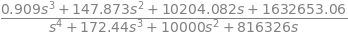

In [ ]:
V_C_simplificado = (0.909*s**3 + 147.873*s**2 + 10204.082*s + 1632653.06)/(s**4 + 172.44*s**3 + 10000*s**2 + 816326*s)
V_C = V_C_simplificado
V_C

In [ ]:
# Expansão em frações parciais do V_C(s)
symdisp('F_{V_C}(s) =', partFrac(V_C, 3), 'Vs')

<IPython.core.display.Math object>

In [ ]:
# raízez V_C(s)
np.roots([12005000000, 2070250000000, 120050000000000, 9.8e15])

array([-142.47601606 +0.j        ,  -14.98648176+74.19553175j,
        -14.98648176-74.19553175j])

In [ ]:
v_c = (2 - 0.178*sp.exp(-t*142.0) + sp.exp(-t*15.0)*2*(-0.457*sp.cos(74.2*t) - 0.323*sp.sin(74.2*t)))*sp.Heaviside(t)

symdisp('v_c(t) =', v_c)

<IPython.core.display.Math object>

## _**Problema 3**_

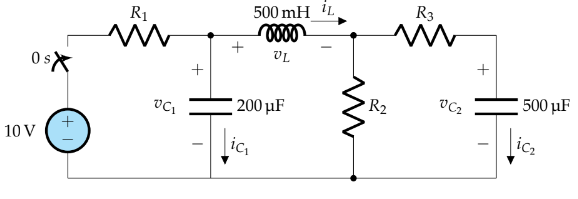

Simulação do circuito: https://tinyurl.com/2gv6b499

#### _**Letra B**_

In [ ]:
V_C1, V_C2, IA, IB, IC, I_L,s = sp.symbols('V_{C1}, V_{C2}, I_A, I_B, I_C, I_L, s')

# define os sistema de equações
eq1 = sp.Eq(-(10/s) + IA + (5000/s)*(IA-IB), 0)             
eq2 = sp.Eq(-(5000/s)*(IA-IB) + 0.5*s*IB + 8*(IB-IC), 0)  
eq3 = sp.Eq(-8*(IB-IC) + 10*IC + (2000/s)*IC, 0)

# resolve o sistema
soluc = sp.solve([eq1, eq2,eq3],[IA, IB, IC], dict=True)
soluc

IA = [sol[IA] for sol in soluc]
IB = [sol[IB] for sol in soluc]
IC = [sol[IC] for sol in soluc]

IA = IA[0]
IB = IB[0]
IC = IC[0]

V_C1 = (5000/s)*(IA-IB)
V_C2 = (2000/s)*IC
I_L = IB

print('Correntes das malhas no domínio de Laplace: \n')
symdisp('I_A(s) =', IA, 'As')
symdisp('I_B(s) =', IB, 'As')
symdisp('I_C(s) =', IC, 'As')
print("\n")


Correntes das malhas no domínio de Laplace: 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
print("Valores das tensões nos capacitores e corrente no indutor pelo método das correntes de malha:\n")
symdisp('V_{C1}(s) =', V_C1.simplify(), 'Vs')
symdisp('V_{C2}(s) =', V_C2.simplify(), 'Vs')
symdisp('I_{L}(s) =', I_L.simplify(), 'As')

Valores das tensões nos capacitores e corrente no indutor pelo método das correntes de malha:



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### _**Conferindo letra 'B' a partir do TVI e TVF.**_

**Teorema do valor inicial (TVI)**

$$
f(0^+) = \lim_{t \to 0^+}f(t) = \lim_{s \to \infty}sF(s)
$$

In [ ]:
# Teorema do Valor Inicial
vc1_0_tvi = sp.limit(s*V_C1, s, infty)
vc2_0_tvi = sp.limit(s*V_C2, s, infty)
il_0_tvi = sp.limit(s*I_L, s, infty)

symdisp('v_{C1}(0^+) = ', vc1_0_tvi, ' V' )
symdisp('v_{C2}(0^+) = ', vc2_0_tvi, ' V' )
symdisp('i_l(0^+) = ', il_0_tvi, ' A' )

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

**Teorema do valor final (TVF)**

$$
f(\infty) = \lim_{t \to \infty}f(t) = \lim_{s \to 0}sF(s)
$$



In [ ]:
# Teorema do Valor Final
vc1_inf_tvf = sp.limit(s*V_C1, s, 0)
vc2_inf_tvf = sp.limit(s*V_C2, s, 0)
il_inf_tvf = sp.limit(s*I_L, s, 0)

symdisp('v_{C1}(\infty) = ', vc1_inf_tvf, ' V' )
symdisp('v_{C2}(\infty) = ', vc2_inf_tvf, ' V' )
symdisp('i_l(\infty) = ', il_inf_tvf, ' A' )

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### _**Letra C**_

**Thévenin**

In [ ]:
IA, IB, V_Th, s = sp.symbols('I_A, I_B, V_{Th}, s')

# define os sistema de equações
eq1 = sp.Eq( -10/s + IA + (5000/s)*(IA-IB), 0)             
eq2 = sp.Eq(-(5000/s)*(IA-IB) + 0.5*s*IB + 8*IB, 0)  

# resolve o sistema
soluc = sp.solve([eq1, eq2],[IA, IB], dict=True)
soluc

IA = [sol[IA] for sol in soluc]
IB = [sol[IB] for sol in soluc]

IA = IA[0]
IB = IB[0]

V_Th = 8*IB
Z_Th = (9*s**2 + 45080*s + 490000)/(0.5*s**2 + 2508*s + 45000)

print('Correntes no domínio de Laplace: \n')
symdisp('I_A(s) =', IA, 'As')
symdisp('I_B(s) =', IB, 'As')
print("\n\n")

Correntes no domínio de Laplace: 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
print("\n\nTensão e Impedância de Thévenin:\n")
symdisp('V_{Th}(s) =', V_Th.simplify(), 'Vs');print('\n')
symdisp('Z_{Th}(s) =', Z_Th, 'Ω')



Tensão e Impedância de Thévenin:



<IPython.core.display.Math object>

<IPython.core.display.Math object>

#### **Conferindo a partir do comportamento da inversa**

**Expandindo em frações parciais**

In [ ]:
# Tirando as raízes do D(s)
np.roots([9, 46080, 5506000, 90000000,0])

array([-4997.99569816,  -102.48058356,   -19.52371828,     0.        ])

In [ ]:
# Expansão em frações parciais do V_C1(s)
symdisp('F_{V_C1}(s) = ', partFrac(V_C1, 4) , ' Vs' )

<IPython.core.display.Math object>

In [ ]:
# Expansão em frações parciais do V_C2(s)
symdisp('F_{V_C2}(s) = ', partFrac(V_C2, 4) , ' Vs' )

<IPython.core.display.Math object>

In [ ]:
# Expansão em frações parciais do I_L(s)
symdisp('F_{I_L}(s) = ', partFrac(I_L, 4) , ' As' )

<IPython.core.display.Math object>

**Determinando $i_{L}(t), v_{C_1}(t)$ e $v_{C_2}(t)$.**

In [ ]:
v_c1 = (8.89 + 1.14*sp.exp(-19.52*t) - 0.02117*sp.exp(-102.5*t) - 10.01*sp.exp(-4998*t))*sp.Heaviside(t)

symdisp('v_{c1}(t) = ', v_c1, 'V')

<IPython.core.display.Math object>

In [ ]:
v_c2 = (8.89 - 11.02*sp.exp(-19.52*t) + 2.136*sp.exp(-102.5*t) - 0.0007297*sp.exp(-4998*t))*sp.Heaviside(t)

symdisp('v_{c2}(t) = ', v_c2, 'V')

<IPython.core.display.Math object>

In [ ]:
i_l = (1.11 - 1.136*sp.exp(-19.52*t) + 0.02074*sp.exp(-102.5*t) + 0.004012*sp.exp(-4998*t))*sp.Heaviside(t)

symdisp('i_l(t) = ', i_l, 'A')

<IPython.core.display.Math object>

**Plotagem das tensões e corrente para conferir resultados.**

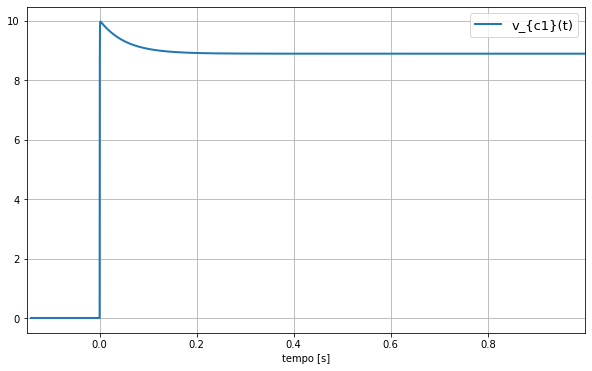

In [ ]:
intervalo = np.arange(-0.15, 1, 0.00005)
symplot(t, v_c1, intervalo, 'v_{c1}(t)')

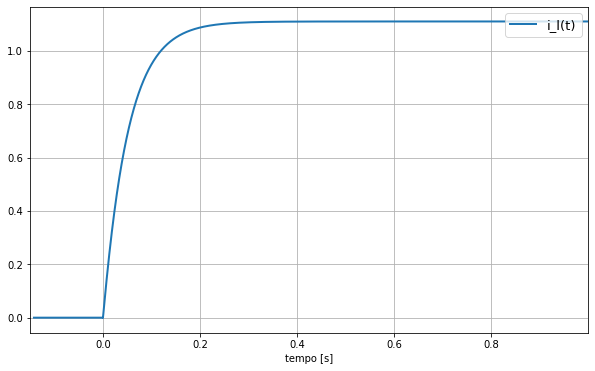

In [ ]:
intervalo = np.arange(-0.15, 1, 0.00005)
symplot(t, i_l, intervalo, 'i_l(t)')

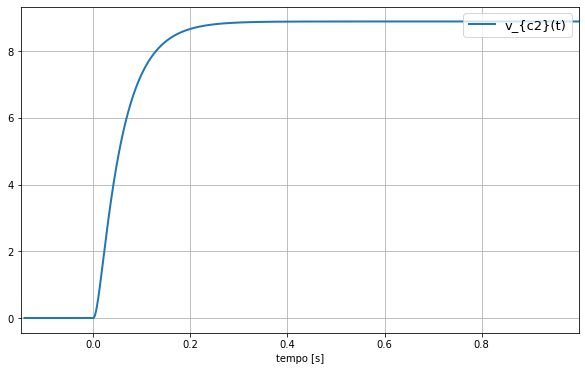

In [ ]:
intervalo = np.arange(-0.15, 1, 0.00005)
symplot(t, v_c2, intervalo, 'v_{c2}(t)')

## _**Problema 4**_

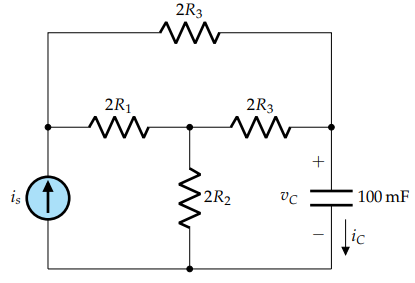

a. Determine a função transferência $H(s)$ de $i_s$ para $v_c$ e a resposta ao impulso $h(t)$.

b. Determine $i_{c}(t)$ via integral de convolução assumindo $i_s(t) = 0.5[u(t)-u(t-1)] A.$

In [ ]:
H, s = sp.symbols('H(s), s')

H = 6.4 / (s + 0.377)

print('Função Transferência: \n')
symdisp('H(s) =', H)

Função Transferência: 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

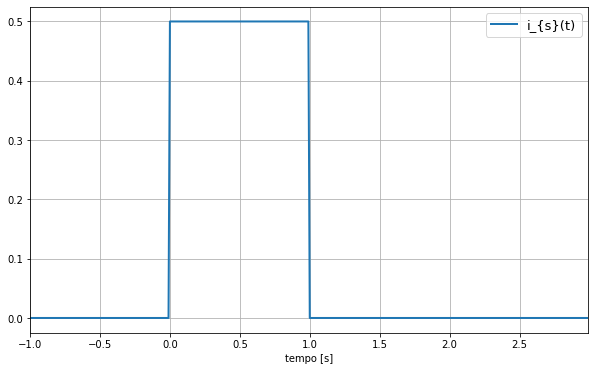

In [ ]:
i_s = 0.5*(sp.Heaviside(t)-sp.Heaviside(t-1))

symdisp('i_{s}(t) =', i_s , ' A')

# plot i_s (porta)
intervalo = np.arange(-1, 3, 0.01)
symplot(t, i_s, intervalo, 'i_{s}(t)')

**Resposta ao impulso h(t) e seu gráfico**

<IPython.core.display.Math object>

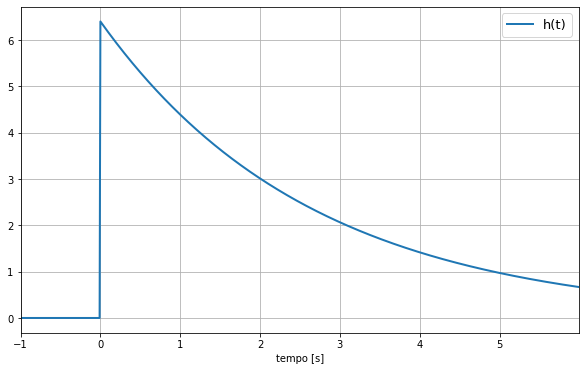

In [ ]:
h = (6.4*sp.exp(-0.377*t) )*sp.Heaviside(t)
symdisp('h(t) = ', h)

# plot h(t)
intervalo = np.arange(-1, 6, 0.01)
symplot(t, h, intervalo, 'h(t)')

In [ ]:
vc1 = 0 # 1º intervalo

vc2 = sp.integrate(3.2*sp.exp(-0.37*τ), (τ, 0, t)) # 2º intervalo

vc3 = sp.integrate(3.2*sp.exp(-0.37*τ), (τ, t-1, t)) # 3º intervalo


vc = sp.Piecewise((vc1, t<0),
                 (vc2, (t>=0)&(t<1)), 
                 (vc3, (t>=1)))

symdisp('v_{c}(t) = ', vc)

<IPython.core.display.Math object>

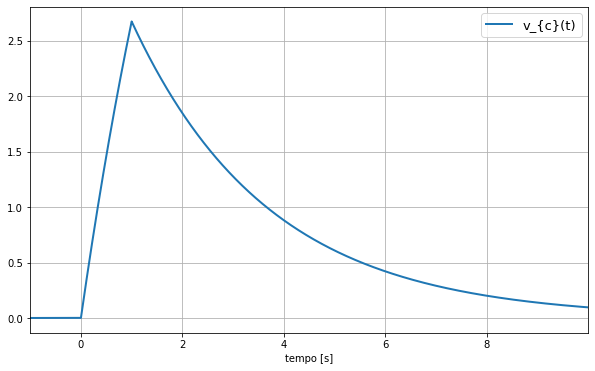

In [ ]:
# plot v_c
intervalo = np.arange(-1, 10, 0.0001)
symplot(t, vc, intervalo, 'v_{c}(t)')

In [ ]:
C = 100e-3 # Valor do capacitor

i_c1 = 0 # 1° intervalo

i_c2 = C * sp.diff(vc2, t) # 2° intervalo

i_c3 = C * sp.diff(vc3,t) # 3° intervalo
 
i_c = sp.Piecewise((i_c1, t<0),
                 (i_c2, (t>=0)&(t<1)), 
                 (i_c3, (t>=1)))

symdisp('i_{c}(t) = ', i_c, "A")

<IPython.core.display.Math object>

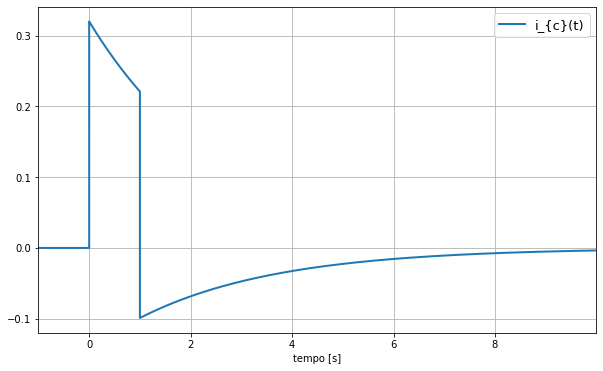

In [ ]:
# plot i_c
intervalo = np.arange(-1, 10, 0.0001)
symplot(t, i_c, intervalo, 'i_{c}(t)')